In [28]:
import pandas as pd
import numpy as np

In [29]:
data=pd.read_csv("nifty_50.csv")

In [30]:
data.sample(5)

,Date,RELIANCE.NS,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,TCS.NS,KOTAKBANK.NS,HINDUNILVR.NS,ITC.NS,LT.NS,...,HEROMOTOCO.NS,DRREDDY.NS,SHREECEM.NS,BRITANNIA.NS,UPL.NS,EICHERMOT.NS,SBILIFE.NS,ADANIPORTS.NS,BAJAJ-AUTO.NS,HINDALCO.NS
7,2024-08-29 00:00:00+05:30,3041.850098,1638.550049,1221.900024,1933.349976,4511.799805,1777.250000,2785.250000,505.100006,3683.449951,...,5374.500000,6931.149902,24821.34961,5831.399902,577.799988,4915.899902,1843.699951,1476.050049,10807.849610,700.500000
0,2024-08-20 00:00:00+05:30,2991.899902,1637.699951,1179.449951,1872.199951,4523.299805,1805.650024,2751.050049,498.799988,3572.699951,...,5244.399902,6965.350098,24730.55078,5765.799805,566.150024,4883.250000,1761.300049,1492.550049,9779.700195,672.900024
22,2024-09-19 00:00:00+05:30,2939.350098,1708.500000,1292.000000,1894.199951,4296.149902,1871.949951,2911.750000,508.250000,3683.699951,...,6006.049805,6502.549805,24931.69922,6134.500000,594.799988,4864.899902,1840.949951,1408.199951,11868.000000,684.200012
15,2024-09-10 00:00:00+05:30,2923.050049,1650.349976,1237.300049,1912.300049,4507.850098,1791.599976,2898.600098,513.599976,3596.149902,...,5669.700195,6650.399902,25725.15039,5969.899902,619.200012,4737.200195,1853.449951,1453.400024,10987.750000,659.500000
17,2024-09-12 00:00:00+05:30,2959.600098,1666.599976,1252.150024,1950.449951,4517.700195,1827.449951,2956.399902,519.500000,3622.000000,...,5803.149902,6683.850098,26019.65039,6109.250000,614.849976,4875.000000,1875.949951,1472.599976,11723.500000,676.200012


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 51 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           24 non-null     object 
 1   RELIANCE.NS    24 non-null     float64
 2   HDFCBANK.NS    24 non-null     float64
 3   ICICIBANK.NS   24 non-null     float64
 4   INFY.NS        24 non-null     float64
 5   TCS.NS         24 non-null     float64
 6   KOTAKBANK.NS   24 non-null     float64
 7   HINDUNILVR.NS  24 non-null     float64
 8   ITC.NS         24 non-null     float64
 9   LT.NS          24 non-null     float64
 10  SBIN.NS        24 non-null     float64
 11  BAJFINANCE.NS  24 non-null     float64
 12  BHARTIARTL.NS  24 non-null     float64
 13  HCLTECH.NS     24 non-null     float64
 14  ASIANPAINT.NS  24 non-null     float64
 15  AXISBANK.NS    24 non-null     float64
 16  DMART.NS       24 non-null     float64
 17  MARUTI.NS      24 non-null     float64
 18  ULTRACEMCO.N

In [32]:
data['Date']=pd.to_datetime(data['Date'])

In [33]:
data.fillna(method='ffill',inplace=True)

C:\Users\bishn\AppData\Local\Temp\ipykernel_14692\286314875.py:1: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



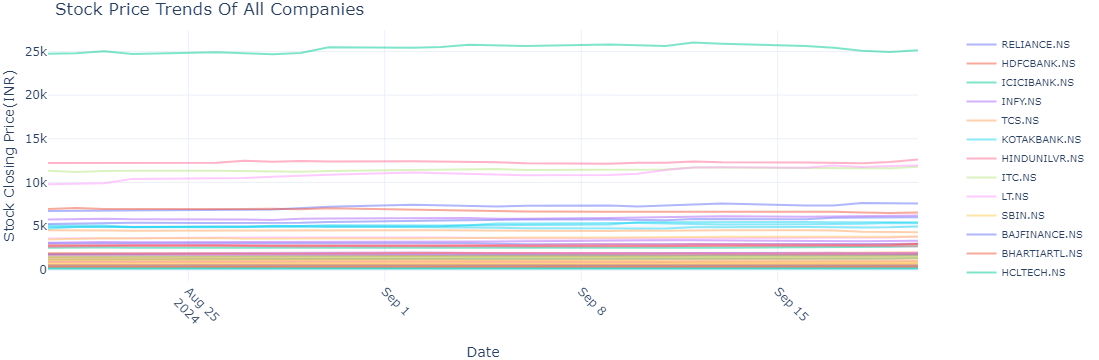

In [34]:
import plotly.express as px
import plotly.graph_objs as go

fig=go.Figure()

for company in data.columns[1:]:
  fig.add_trace(go.Scatter(x=data["Date"],y=data[company],
                           mode='lines',
                           name=company,
                           opacity=0.5))

fig.update_layout(
    title="Stock Price Trends Of All Companies",
    xaxis_title="Date",
    yaxis_title="Stock Closing Price(INR)",
    xaxis=dict(tickangle=45),
    legend=dict(
        x=1.05,
        y=1,
        traceorder="normal",
        font=dict(size=10),
        orientation="v"
    ),
    margin=dict(l=0,r=0,t=30,b=0),
    hovermode="x",
    template='plotly_white'
)
fig.show()

# Let's look at the comapnies with heighest risks for invetsting

In [15]:
all_companies=data.columns[1:]

volatility_all_companies=data[all_companies].std()

volatility_all_companies.sort_values(ascending=False).head(10)



BAJAJ-AUTO.NS    659.810841
SHREECEM.NS      429.919834
BAJFINANCE.NS    306.658594
DIVISLAB.NS      247.674895
HEROMOTOCO.NS    247.092728
DRREDDY.NS       175.124908
ULTRACEMCO.NS    172.673053
DMART.NS         155.593701
BRITANNIA.NS     144.164343
MARUTI.NS        109.587341
dtype: float64

# Now, let's look at the companies with the heighest growth rate

In [16]:
growth_all_companies=data[all_companies].pct_change()*100
average_growth_all_companies=growth_all_companies.mean()
average_growth_all_companies.sort_values(ascending=False).head(10)

C:\Users\bishn\AppData\Local\Temp\ipykernel_14692\1477463319.py:1: FutureWarning:

The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.



BAJAJ-AUTO.NS    0.883421
BAJAJFINSV.NS    0.791730
BHARTIARTL.NS    0.735219
DIVISLAB.NS      0.634851
HEROMOTOCO.NS    0.602192
ICICIBANK.NS     0.557742
BAJFINANCE.NS    0.536819
TITAN.NS         0.393800
HINDUNILVR.NS    0.351634
BRITANNIA.NS     0.327747
dtype: float64

# Now, let's have alook at the companies with the heighest return of investment

In [17]:
initial_prices_all=data[all_companies].iloc[0]
final_prices_all=data[all_companies].iloc[-1]

roi_all_company=((final_prices_all-initial_prices_all)/initial_prices_all)*100
roi_all_company.sort_values(ascending=False).head(10)

BAJAJ-AUTO.NS    22.107017
BAJAJFINSV.NS    19.642973
BHARTIARTL.NS    18.120966
DIVISLAB.NS      15.404976
HEROMOTOCO.NS    14.660402
ICICIBANK.NS     13.480860
BAJFINANCE.NS    12.797149
TITAN.NS          9.275089
HINDUNILVR.NS     8.235039
BRITANNIA.NS      7.713587
dtype: float64

# Creating a Mutual fund plan Based on on high ROI and low risk(volatility)
  To create a strategy for selecting companies with high ROI and LOW RISK,we can use combination of ROI and volatility(SD) metrics.the goal to find companies that offer a high return on investment(ROI) but with low volatility to minimize risk.

  here are the steps we can follow for creating a mutual fund plan:

  - Define ROI and Volatility threshold :- we will set threshold for ROI and Volatility to select company that provide good returns with lower risk

In [18]:
roi_threshold=roi_all_company.median()
volatility_threshold=volatility_all_companies.median()

selected_companies=roi_all_company[(roi_all_company>roi_threshold) & (volatility_all_companies<volatility_threshold)]
selected_companies.sort_values(ascending=False)

ICICIBANK.NS     13.480860
INDUSINDBK.NS     7.159914
JSWSTEEL.NS       7.021748
AXISBANK.NS       6.592466
HDFCBANK.NS       6.319839
SUNPHARMA.NS      5.627425
KOTAKBANK.NS      5.474481
CIPLA.NS          4.850117
NTPC.NS           4.356926
dtype: float64

In [19]:
# let's calculate the weight for each company


# let's calculate the weight for each company

In [20]:
selected_volatility=volatility_all_companies[selected_companies.index]

inverse_volatility= 1/selected_volatility
investment_ratios=inverse_volatility/inverse_volatility.sum()

investment_ratios.sort_values(ascending=False)

NTPC.NS          0.280768
JSWSTEEL.NS      0.159985
AXISBANK.NS      0.092231
HDFCBANK.NS      0.089330
CIPLA.NS         0.084783
KOTAKBANK.NS     0.076642
INDUSINDBK.NS    0.074432
SUNPHARMA.NS     0.072553
ICICIBANK.NS     0.069276
dtype: float64

In [21]:
# Analysing Our Mutual Fund plan

# Analysing Our Mutual Fund plan

we have created mutual plan for lpong term investment.

In [22]:
top_growth_companies=average_growth_all_companies.sort_values(ascending=False)
risk_growth_rate_companies=volatility_all_companies[top_growth_companies.index].sort_values(ascending=False)
risk_mutual_fund_companies=volatility_all_companies[selected_companies.index]

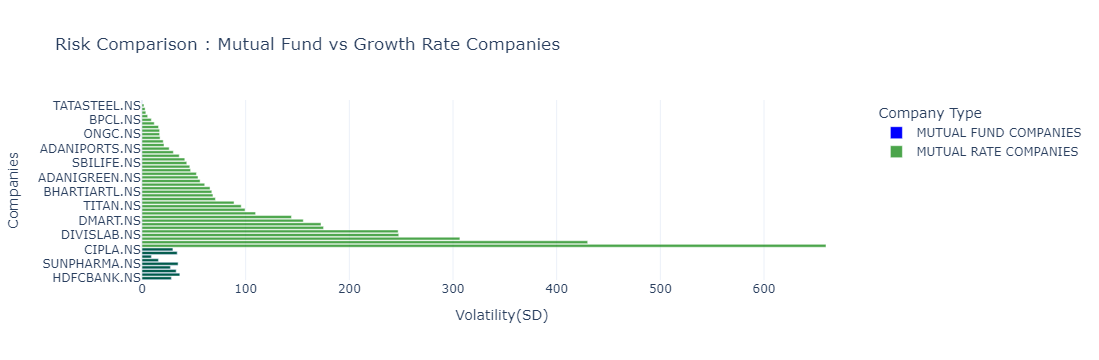

In [23]:
fig=go.Figure()

fig.add_trace(go.Bar(
    y=risk_mutual_fund_companies.index,
    x=risk_mutual_fund_companies,
    orientation='h', #hrizonatal bar
    name='MUTUAL FUND COMPANIES',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    y=risk_growth_rate_companies.index,
    x=risk_growth_rate_companies,
    orientation='h', #hrizonatal bar
    name='MUTUAL RATE COMPANIES',
    marker=dict(color='green'),
    opacity=0.7
))

fig.update_layout(
    title="Risk Comparison : Mutual Fund vs Growth Rate Companies",
    xaxis_title="Volatility(SD)",
    yaxis_title="Companies",
    barmode='overlay',
    legend=dict(title="Company Type"),
    template='plotly_white'
)

fig.show()

# Now,Let's compare the ROI of both the groups as well

In [24]:
expected_roi_mutual_fund=roi_all_company[selected_companies.index]
expected_roi_growth_companies=roi_all_company[top_growth_companies.head(10).sort_values(ascending=False).index]


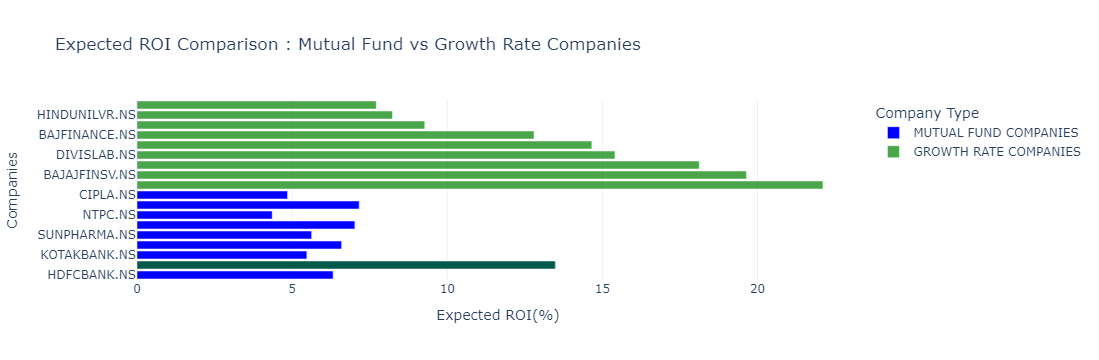

In [25]:
fig=go.Figure()

fig.add_trace(go.Bar(
    y=expected_roi_mutual_fund.index,
    x=expected_roi_mutual_fund,
    orientation='h', #hrizonatal bar
    name='MUTUAL FUND COMPANIES',
    marker=dict(color='blue')
))

fig.add_trace(go.Bar(
    y=expected_roi_growth_companies.index,
    x=expected_roi_growth_companies,
    orientation='h', #hrizonatal bar
    name='GROWTH RATE COMPANIES',
    marker=dict(color='green'),
    opacity=0.7
))

fig.update_layout(
    title="Expected ROI Comparison : Mutual Fund vs Growth Rate Companies",
    xaxis_title="Expected ROI(%)",
    yaxis_title="Companies",
    barmode='overlay',
    legend=dict(title="Company Type"),
    template='plotly_white'
)

fig.show()

#The comparison between the risk (volatility) and expected ROl for mutual fund companies (in blue) and growth rate companies (in green) shows a clear trade-off. Mutual fund companies offer lower volatility, meaning they are less risky, but also provide lower expected returns. In contrast, growth rate companies demonstrate higher volatility, indicating more risk, but they offer much higher potential returns, especially companies like Bajaj Auto and Bajaj Finserv. This highlights a common investment dilemma: lower risk comes with a lower reward, while higher risk could yield higher returns.
For long-term investments, the goal is typically to find companies that offer a balance of stable returns and manageable risk. The companies in our mutual fund exhibit low volatility, meaning they are less risky, and their moderate returns make them solid choices for long-term, stable growth. They are well-suited for conservative investors who want steady returns without significant fluctuations in value.
# Calculating Expected Returns
Now, let's calculate the expected returns a person will get from our mutual fund if he/she invests £5000 every month.
To calculate the expected value a person will accumulate over 1 year, 3 years, 5 years, and 10 years through the mutual fund plan, we can follow these steps:

(1).Assume the person is investing 5000 rupees every month.

(2).Use the expected ROl from the mutual fund companies to simulate the growth over time.

(3). Compute the compounded value of the investments for each period (1y, 3y, 5y, and 10y). Visualize the accumulated value over these periods.
* Parameters:

In [26]:
# parameter:
# p: the periodic investment amount(eg. monthly in following case)
# r: the annual interest rate
# n: the number of times interest is compund per year
# t: the total investment period in years

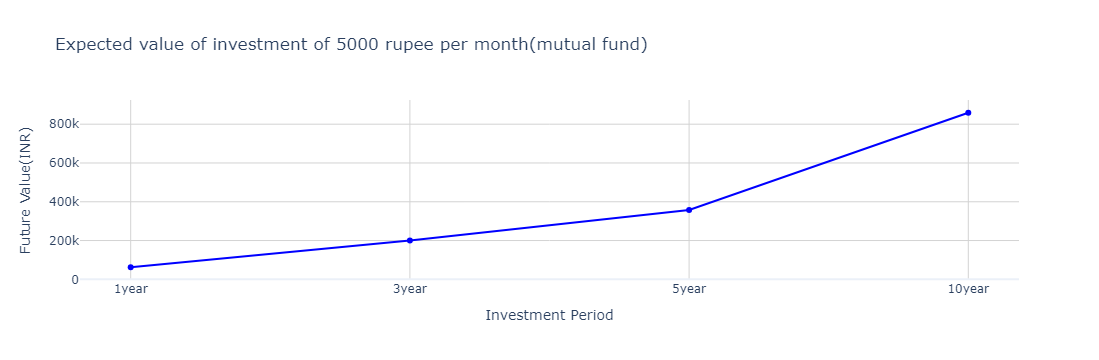

In [27]:
import numpy as np

monthly_investment=5000
years=[1,3,5,10]
n=12

avg_roi=expected_roi_mutual_fund.mean()/100

def future_value(p,r,n,t):
  return p*(((1+r/n)**(n*t)-1)/(r/n))*(1+r/n)

future_values=[future_value(monthly_investment,avg_roi,n,year) for year in years]

fig=go.Figure()

fig.add_trace(go.Scatter(
    x=[str(year) + "year" for year in years],
    y=future_values,
    mode='lines+markers',
    name='Future Value',
    marker=dict(color='blue'),
    line=dict(color='blue')
) )

fig.update_layout(
    title='Expected value of investment of 5000 rupee per month(mutual fund)',
    xaxis_title='Investment Period',
    yaxis_title='Future Value(INR)',
    xaxis=dict(showgrid=True,gridcolor='Lightgrey'),
    yaxis=dict(showgrid=True,gridcolor='Lightgrey'),
    template='plotly_white',
    hovermode='x'
)
fig.show()

# After 1 year, the accumulated value is around Rs62,000, and by 5 years, it grows to over Rs300,000.
The long-term benefit is evident, with the investment growing to nearly Rs860,000 over 10 years, which emphasises the value of consistent investing and compounding over time for long-term investors.

# Summary
So, this is how a mutual fund plan is designed by investment companies for long-term investors. Mutual funds are investment plans that pool money from multiple investors to purchase a diversified portfolio of stocks, bonds, and other securities, managed by professional fund managers.